<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'> Medical Insurance Cost Prediction model</h1>
</div>

## Inputs

In [6]:
# Input file name with path
input_file_name = 'insurance.csv'

# Target class name
input_target_class = "charges"

# Columns to be removed
input_drop_col = "sex"

# Col datatype selection
input_datatype_selection = 'manual'

# Categorical columns
input_cat_columns = ['sex', 'smoker', 'region']

# Numerical columns
input_num_columns = ['age', 'bmi', 'children','charges']

# Encoding technique
input_encoding = 'LabelEncoder'

# Handle missing value
input_treat_missing_value = 'drop'

# Machine learning algorithm
input_ml_algo = 'RandomForestRegressor'

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Load the Data</h2>
</div>

### 1.1. Import Libraries

In [7]:
# Import libraries

# Data Manipulation
import numpy as np
import pandas as pd
from   pandas import DataFrame

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from   sklearn.model_selection import train_test_split, GridSearchCV
from   sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pickle

# Maths
import math

# Set the options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

### 1.2. Load the datasets


In [8]:
# Read data in form of a csv file
df = pd.read_csv('insurance.csv')

# First 5 rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Overview of the Data</h2>
</div>

### 2.1. Descriptive Statistics


In [9]:
# Dimension of the data
df.shape

(1338, 7)

In [10]:
# Summary of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 2.2 Missing Values


In [11]:
# Missing values for every column
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Exploratory Data Analaysis</h2>
</div>

### 3.1. Extract data types of columns

In [12]:
# Remove extra columns
col_remove = input_drop_col
df = df.drop(col_remove, axis = 1)

In [13]:
# Get the list of numeric and categorical columns according to the input
if input_datatype_selection == "auto":

    binary_columns = [col for col in df.columns if df[col].nunique() == 2]
    print("Binary Columns : ", binary_columns)

    categorical_columns = [col for col in df.columns if df[col].dtype == "object"]
    print("Categorical Columns : ", categorical_columns)

    categorical_columns = binary_columns + categorical_columns
    categorical_columns = list(set(categorical_columns))

    numerical_columns = [col for col in df.columns if col not in categorical_columns]
    print("Numerical Columns : ", numerical_columns)

else:
    categorical_columns = input_cat_columns
    print("Categorical Columns : ", categorical_columns)

    numerical_columns   = input_num_columns
    print("Numerical Columns : ", numerical_columns)

Categorical Columns :  ['sex', 'smoker', 'region']
Numerical Columns :  ['age', 'bmi', 'children', 'charges']


### 3.2 Check distribution of target class

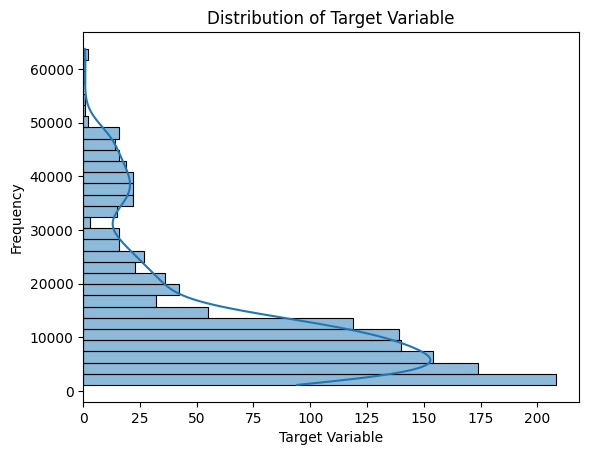

In [14]:
# Assuming 'y' is your target variable
sns.histplot(y=df[input_target_class], kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.show()

### 3.3. Check the distribution of every feature

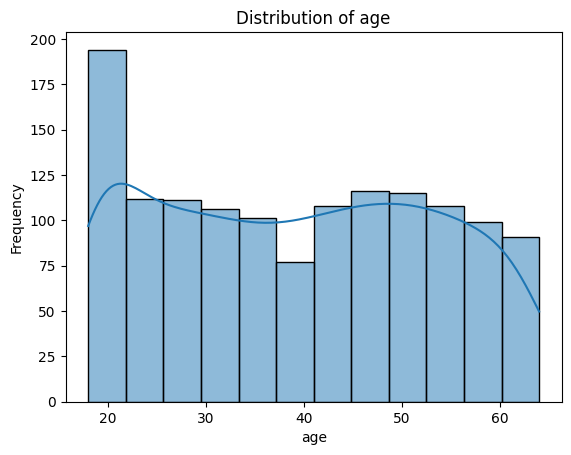

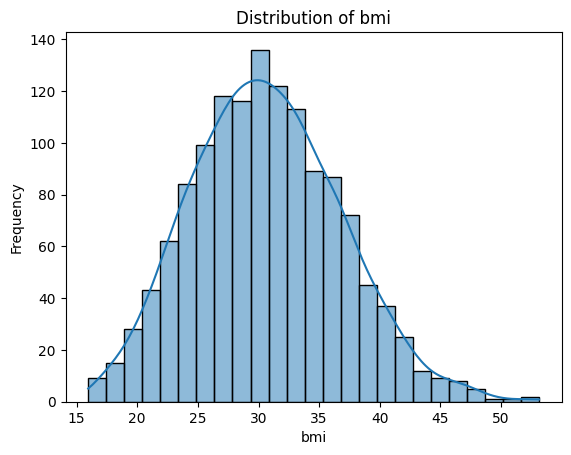

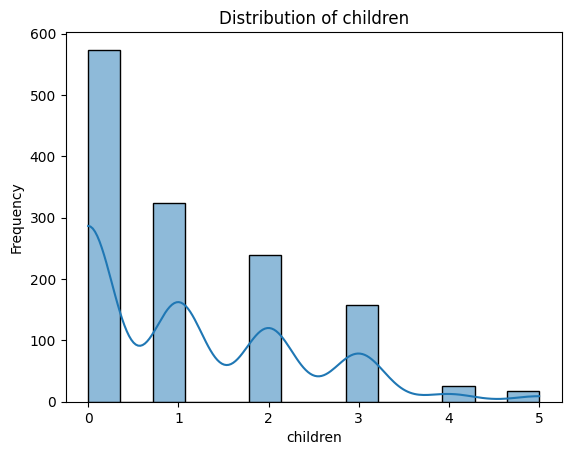

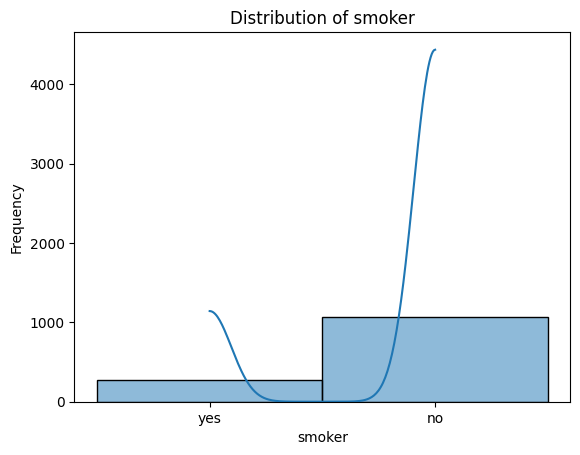

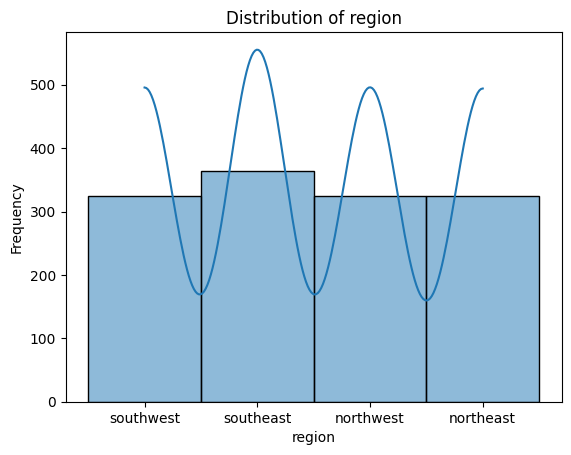

In [15]:
# Check the distribution of all the features
for column in df.columns:
    if column != 'charges':
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. Data Preparation</h2>
</div>

### 4.1. Feature Encoding

In [16]:
#Label encoding
df['smoker'] = df['smoker'].apply({'yes': 1, 'no': 0}.get)
df['region'] = df['region'].apply({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4}.get)

In [17]:
df.head()

,age,bmi,children,smoker,region,charges
0,19,27.900,0,1,1,16884.92400
1,18,33.770,1,0,2,1725.55230
2,28,33.000,3,0,2,4449.46200
3,33,22.705,0,0,3,21984.47061
4,32,28.880,0,0,3,3866.85520


### 4.2. Split X and y

In [18]:
# Split the y variable series and x variables dataset
X = df.drop([input_target_class],axis=1)
y = df[input_target_class]

### 4.3 Train - Test Split

In [19]:
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>5. Model Building</h2>
</div>

### 5.1 Train Model


In [20]:
# Select the algorithm according to the input provided

model = RandomForestRegressor()

In [21]:
# Training the model:
model.fit(X_train, y_train)

model

RandomForestRegressor()

### 5.2 Model Predictions

In [22]:
# Predict class for test dataset
y_pred = model.predict(X_test)

print("Y predicted : ",y_pred)

Y predicted :  [10866.5634132  10018.7508195  45023.421066   13063.61034
  9749.8782367   9475.3032218   2162.6920994  11236.6189041
  7329.2463755   6168.1490395   7192.4921645  20241.5170929
  7260.5737272   6131.068587   23745.630553   12915.9659555
 13615.6626177   7835.7870466   6477.788401   33960.1293401
 24164.6622085  15696.0179526  12180.8987758  27515.2059312
  3249.7219708  11734.8187765   7469.5048335   8676.4157964
  3767.246627   10647.7787523   7650.3814926  48607.5026792
 14375.6682768  12448.8154724  17188.5013865   3906.0200985
  8853.8275421  38231.0799761  39481.2766165   5408.8917916
  9112.8603347   3741.9663085  21213.7572465  47520.8761171
 37072.3767446   3793.9576461  13306.6884069   7087.565728
  6447.1974025  12579.457158    3926.7414888   4139.5307456
 27739.6882949  49114.9257812  11569.255822   10482.1513703
  3351.2756203  11908.0716004  11504.5906308  16204.9277867
  1749.3078715  47359.915998   15814.5502224  12034.9825053
 16701.6500699   9598.918263

### 5.3. Model Evaluation


In [23]:
# Calculate RMSE
rf_rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Random Forest RMSE: {rf_rmse}")

Random Forest RMSE: 4734.53594784011


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6. Improve Model</h2>
</div>

### 6.1. Hyperparameter Tuning

In [33]:
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [34]:
# Define the parameters gird for random forest
param_grid_random_forest = {'max_depth'   : [10,20,40],
                            'n_estimators' : [100,200,300],
                            'min_samples_leaf' : [1,2,5]
                           }

In [39]:
# Run grid search
grid = GridSearchCV(RandomForestRegressor(), param_grid_random_forest, refit=True, verbose=3, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 40],
                         'min_samples_leaf': [1, 2, 5],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [36]:
# Prediction using best parameters
y_pred = grid.predict(X_test)

print("Y predicted : ",y_pred)


Y predicted :  [11173.11737486 10184.2370293  45811.00530988 13799.63503326
 10379.29352083  7332.50542805  2447.14490516 12993.80103731
  7367.15088409  6583.89146876  7630.71118749 15183.26452981
  8203.55857686  5634.46331547 19819.38351741 12530.78442373
 14375.70430504  7108.96274898  6685.8232804  34492.78564528
 23424.30173021 16199.56849693 11670.51204039 28244.95872593
  3715.73580481  9954.35033067  5686.44261423  8476.54126277
  3720.63139887 10314.93432284  7614.39404218 48475.24196344
 14096.29928502 11895.43757551 16061.6788982   4615.63178108
  9309.29662671 38570.54777573 39278.69848891  4322.37945795
  7251.00579884  3843.63814255 20786.3362266  48406.08749
 38095.14355222  4059.93465985 12601.10045085  6958.40888668
  7326.84629411 13136.33018421  3266.91221695  3724.15040692
 27380.60198626 47212.41715086 11576.47266753  8583.67138352
  3477.10445571 12472.90238962  9129.4547461  15640.42156959
  2246.89514423 45716.85346746 17677.0778624  11066.56306852
 13364.30903

In [37]:
# Calculate RMSE
rf_rmse = mean_squared_error(y_test, y_pred)
print(f"Random Forest RMSE: {rf_rmse}")

Random Forest RMSE: 18281906.562076584


### 6.2. Save the final model

In [38]:
# Save the best model to disk
with open('model.pkl', 'wb') as f:
    pickle.dump(grid.best_estimator_, f)